7장 신경망

7.4 코드 샘플 및 바닐라 MLP

7.4.1 회귀 예시

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_raw = pd.read_csv('data_ml.csv')
idx_date = data_raw.index[(
    data_raw['date'] > '1999-12-31') & (
    data_raw['date'] < '2019-01-01')].tolist()
#날짜를 받기 위한 인덱스 생성
data_ml = data_raw.iloc[idx_date]
#날짜 인덱스에 따라 데이터셋 필터링
data_ml.iloc[0:6, 0:6]

features = list(data_ml.iloc[:, 3:95].columns)
# 특성의 열 이름 저장 
features_short = ["Div_Yld", "Eps", "Mkt_Cap_12M_Usd",
                  "Mom_11M_Usd", "Ocf", "Pb", "Vol1Y_Usd"]

separation_date = "2014-01-15"
idx_train = data_ml.index[(data_ml['date']<separation_date)].tolist()
idx_test = data_ml.index[(data_ml['date']>=separation_date)].tolist()
training_sample = data_ml[data_ml.index.isin(idx_train)]
testing_sample = data_ml[data_ml.index.isin(idx_test)]

In [2]:
import numpy as np
print(np.__version__)

1.26.4


In [3]:
import tensorflow as tf
from plot_keras_history import show_history, plot_history
NN_train_features = training_sample[features].values
NN_train_labels = training_sample['R1M_Usd'].values
NN_test_features = testing_sample[features].values
NN_test_labels = testing_sample['R1M_Usd'].values

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(len(features),)))
model.add(layers.Dense(8,activation="tanh"))
model.add(layers.Dense(1))

c:\ProgramData\miniconda3\envs\tensor\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='RMSprop',
              loss='mse',
              metrics=['MeanAbsoluteError'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │         1,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,633 (6.38 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - MeanAbsoluteError: 0.1091 - loss: 0.0392 - val_MeanAbsoluteError: 0.0682 - val_loss: 0.0372
Epoch 2/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 695us/step - MeanAbsoluteError: 0.0846 - loss: 0.0300 - val_MeanAbsoluteError: 0.0672 - val_loss: 0.0371
Epoch 3/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - MeanAbsoluteError: 0.0847 - loss: 0.0332 - val_MeanAbsoluteError: 0.0663 - val_loss: 0.0369
Epoch 4/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - MeanAbsoluteError: 0.0841 - loss: 0.0336 - val_MeanAbsoluteError: 0.0666 - val_loss: 0.0370
Epoch 5/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - MeanAbsoluteError: 0.0837 - loss: 0.0238 - val_MeanAbsoluteError: 0.0668 - val_loss: 0.0370
Epoch 6/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - MeanAbsoluteError: 0.0836 - loss: 0.0294 - val_MeanAbsoluteError: 0.0671 - val_loss: 0.0370
Epoch 7/10
774/774 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - MeanAbsoluteError: 0.0842 - loss: 0.0286 - val_MeanAbsol

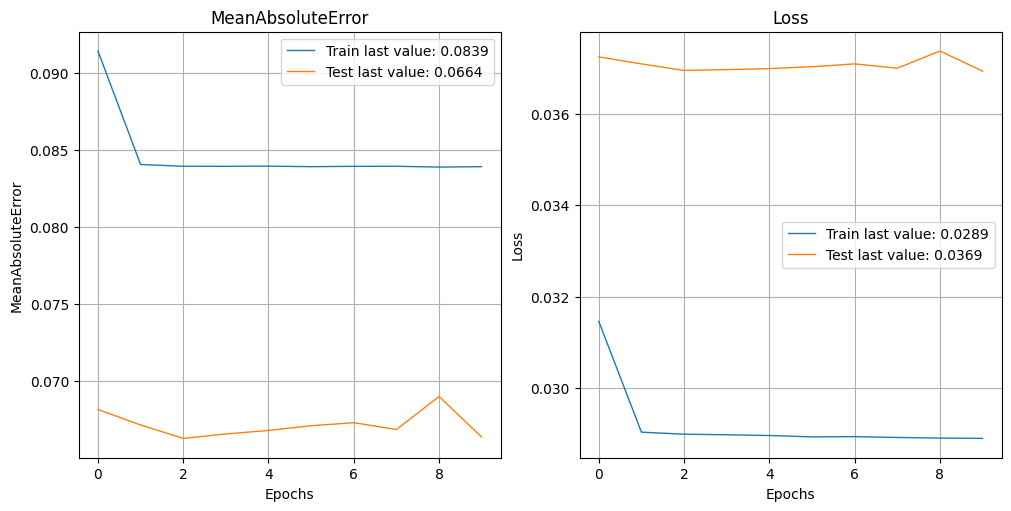

In [6]:
fit_NN = model.fit(
    NN_train_features,
    NN_train_labels,
    batch_size=256,
    epochs=10,
    validation_data=(NN_test_features,NN_test_labels),
    verbose=True
)
show_history(fit_NN)

In [7]:
#hitratio = np.mean(model.predict(NN_test_features)*NN_test_labels>0)
#print(f'Hitratio: {hitratio}')

In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(tf.__version__)
device_lib.list_local_devices()

2.18.0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2125416450921353015
 xla_global_id: -1]